<a href="https://colab.research.google.com/github/KruthiHU/Number-Recognition/blob/main/NumberRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1441 - accuracy: 0.9551 - val_loss: 0.0514 - val_accuracy: 0.9823
Epoch 2/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0472 - accuracy: 0.9852 - val_loss: 0.0505 - val_accuracy: 0.9850
Epoch 3/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0396 - val_accuracy: 0.9868
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0265 - accuracy: 0.9921 - val_loss: 0.0377 - val_accuracy: 0.9886
Epoch 5/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0196 - accuracy: 0.9941 - val_loss: 0.0401 - val_accuracy: 0.9867


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0401 - accuracy: 0.9867
Test accuracy: 0.9866999983787537


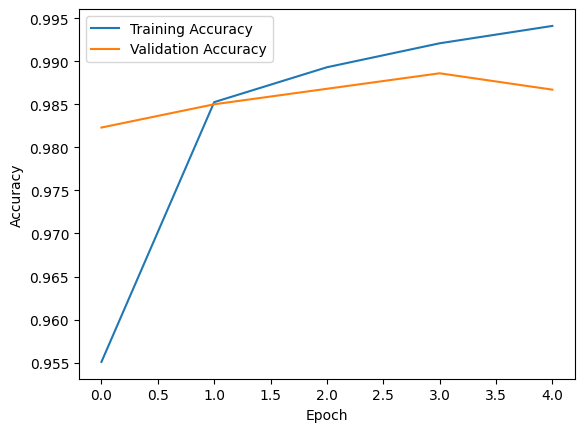

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have 20 predictions
num_predictions = 20

# Make predictions using the trained model
predictions = model.predict(test_images)

313/313 [==============================] - 3s 9ms/step


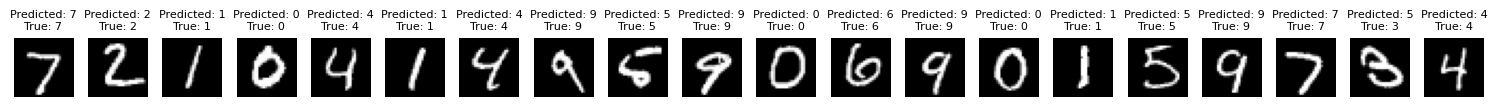

In [ ]:
# Displaying the first 10 images in the first row
plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(1, 20, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')  # Assuming the images are flattened, reshape if needed
    plt.title(f"Predicted: {np.argmax(predictions[i])}\nTrue: {np.argmax(test_labels[i])}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()